## Unsupervised Learning 

Shuting Chen 

12/03/2017

### Part 1. Colleges 

In [82]:
# Import useful packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hr

%matplotlib inline 

#### Question 1. 

In [83]:
# Import data 
colleges = pd.read_csv("college.csv")
# Convert "Private" into a numeric variable
colleges.Private.replace(to_replace=["Yes", "No"],value=[1, 0], inplace=True)
# Scale variables before PCA
X = pd.DataFrame(scale(colleges), columns = colleges.columns)
# PCA
pca = PCA().fit(X)

In [84]:
# Loadings for all principal components 
component_names = [f"Component{i}" for i in range(1, len(colleges.columns) + 1)]
loadings = pd.DataFrame(pca.components_.T, index=colleges.columns, columns=component_names)
loadings 

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15,Component16,Component17,Component18
Private,0.089010,-0.345879,0.151387,0.231135,0.044286,-0.031448,0.178345,0.032314,0.084985,0.259596,-0.679758,0.245690,0.400649,-0.010057,0.023202,-0.005373,0.044796,0.007795
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283
Accept,0.153797,0.372557,-0.025351,0.317486,0.031438,0.013074,-0.015474,-0.054225,-0.165274,0.089482,-0.142627,0.004545,-0.073616,0.293398,0.033349,-0.146347,-0.512188,-0.547462
Enroll,0.117797,0.399697,-0.027576,0.204836,-0.065667,-0.043065,-0.008237,0.063261,-0.116813,0.074073,-0.105826,-0.034260,0.059072,-0.446273,-0.081525,0.028481,-0.403907,0.607174
Top10perc,0.360349,-0.016238,0.004681,-0.107519,-0.388227,-0.059923,-0.144406,-0.097143,0.355676,0.059358,0.022126,-0.015181,0.044352,0.000092,-0.106170,0.697422,-0.148018,-0.146308
Top25perc,0.344751,0.017730,-0.058948,-0.146260,-0.409809,0.020615,-0.079889,-0.078063,0.422445,0.043560,-0.138169,-0.231232,-0.099783,0.023782,0.148674,-0.616897,0.050194,0.080606
F.Undergrad,0.094088,0.410732,-0.016806,0.143032,-0.046589,-0.045743,0.000282,0.083930,-0.049761,0.050439,-0.078360,-0.062500,0.069732,-0.525078,-0.053386,0.009842,0.569725,-0.408938
P.Undergrad,-0.017483,0.293064,0.149371,-0.097767,0.327967,-0.196779,0.162965,0.569890,0.543201,-0.229478,-0.045070,0.121136,-0.022846,0.126137,0.019558,0.020679,-0.050648,0.008963
Outstate,0.327664,-0.191518,0.066363,0.128799,0.203252,-0.020296,0.094948,-0.004122,-0.011433,0.197326,-0.064253,0.255436,-0.803653,-0.128007,-0.057204,0.041948,0.078622,0.048023
Room.Board,0.266534,-0.093979,0.182114,0.182427,0.526257,0.183029,0.145142,-0.248673,0.244240,0.189863,0.280765,-0.485832,0.201397,-0.072308,-0.055970,0.003513,-0.028890,0.000368


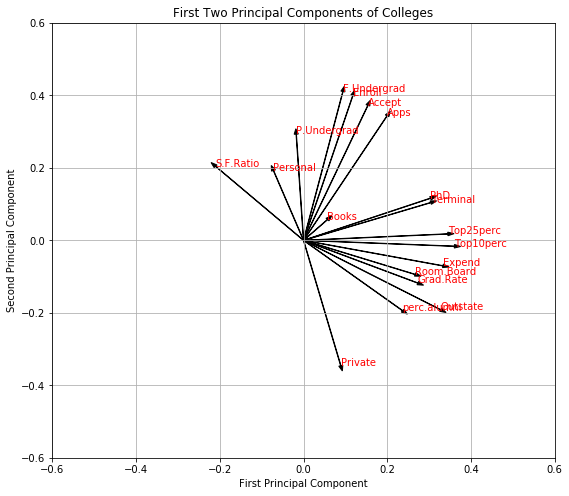

In [85]:
# Plot the first two principal components 
fig, ax = plt.subplots(figsize=(9, 8))
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)

for i in loadings[["Component1", "Component2"]].index:
    plt.annotate(i, xy=(loadings.Component1.loc[i], loadings.Component2.loc[i]), color='red')

for i in range(len(colleges.columns)):
    plt.arrow(0, 0, loadings.Component1[i], loadings.Component2[i], head_width=0.01, fc='k')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Principal Components of Colleges")
plt.grid(True)
plt.show()

It is shown in the plot that Top10perc, Top25perc, Expend, Outstate, Terminal and PhD are most correlated with the first principal component while F.Undergrad, Enroll, Accept, Private and Apps are most correlated with the second principal component. 

#### Question 2. Compute the cumulative proportion of variance explained 

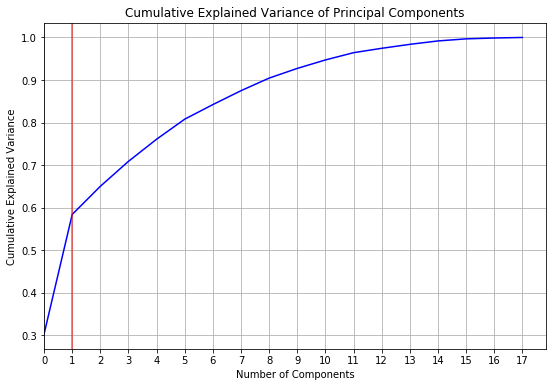

Approximately 58.42% of the variance in College is explained by the first two principal components.


In [86]:
ax = figure(figsize=(9, 6)).gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_), color = 'b')
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=len(colleges.columns)))
ax.set_xlim(xmin=0)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=1, linewidth=2, color='r', alpha=0.5)
plt.title('Cumulative Explained Variance of Principal Components')
plt.grid(True)
show()

# Compute the cumulative proportion of variance explained by the first two components
prop = (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100
print("Approximately {:.2f}% of the variance in College is explained by the first two principal components.".format(
    prop))

### Part 2. Clustering states 

#### Question 1. 

In [87]:
# Import data 
crime = pd.read_csv("USArrests.csv", index_col=0)
# PCA - without standardizing 
pca1 = PCA(n_components=2).fit(crime)
pca2 = PCA(n_components=2).fit(crime).transform(crime)
crime1 = pd.DataFrame(pca1.components_.T, index=crime.columns, columns=['Component 1', 'Component 2'])
crime2 = pd.DataFrame(pca2, index=crime.index, columns=['Component 1', 'Component 2'])
crime2.head()

,Component 1,Component 2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


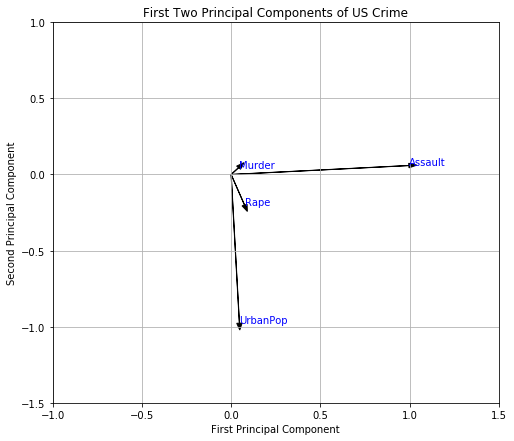

In [88]:
fig, ax1 = plt.subplots(figsize=(8, 7))
ax1.set_xlim(-1.0, 1.5)
ax1.set_ylim(-1.5, 1.0)
for i in crime1.index:
    plt.annotate(i, xy=(crime1['Component 1'].loc[i], crime1['Component 2'].loc[i]), color='b')
for i in range(len(crime.columns)):
    plt.arrow(0, 0, crime1['Component 1'][i], crime1['Component 2'][i], head_width=0.03, fc='k')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Principal Components of US Crime")
plt.grid(True)
plt.show()

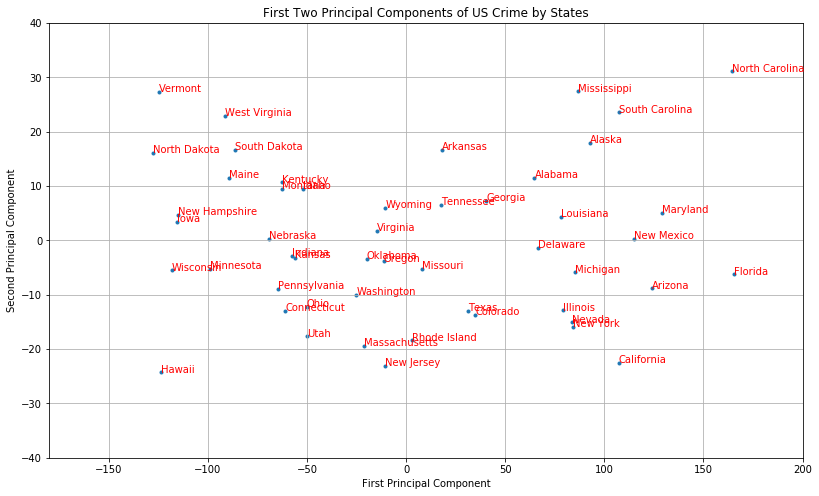

In [89]:
# Plot the observations(states) on the first and second principal components
fig, ax2 = plt.subplots(figsize=(13.5, 8))
ax2.set_xlim(-180, 200)
ax2.set_ylim(-40, 40)
plt.scatter(x = crime2['Component 1'], y = crime2['Component 2'], marker = '.')
for i in crime.index:
    plt.annotate(i, (crime2.loc[i]['Component 1'], crime2.loc[i]['Component 2']), color = 'r')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("First Two Principal Components of US Crime by States")
plt.grid(True)
plt.show()

#### Question 2. K-means clustering with K = 2 

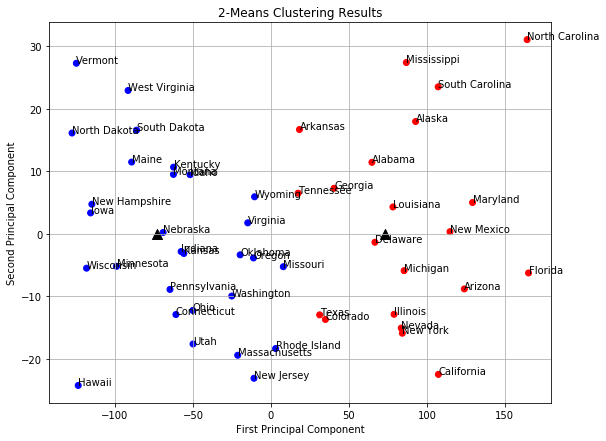

In [90]:
# K-means clustering with K = 2
km2 = KMeans(n_clusters=2, n_init=20).fit(crime)
km2.labels_
# Scatterplot of 2-means clustering results 
plt.figure(figsize=(9,7))
plt.scatter(crime2['Component 1'], crime2['Component 2'], c=np.array(['red', 'blue'])[km2.labels_])
plt.scatter(pca1.fit_transform(km2.cluster_centers_)[:,0], pca1.fit_transform(km2.cluster_centers_)[:,1], 
            marker='^', s=100, c='k')
for i in crime2.index:
    plt.annotate(i, (crime2['Component 1'].loc[i]+.01, crime2['Component 2'].loc[i]+.01))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2-Means Clustering Results')
plt.grid(True)
plt.show()

As we can see from the scatterplot above, observations have been divided into two groups. 29 states such as Vermont, West virginia, North Dakota, etc. are in the first group while the rest 21 states such as North Carlina, Mississippi, etc. belong to the second group. 

#### Question 3. K-means clustering with K = 4

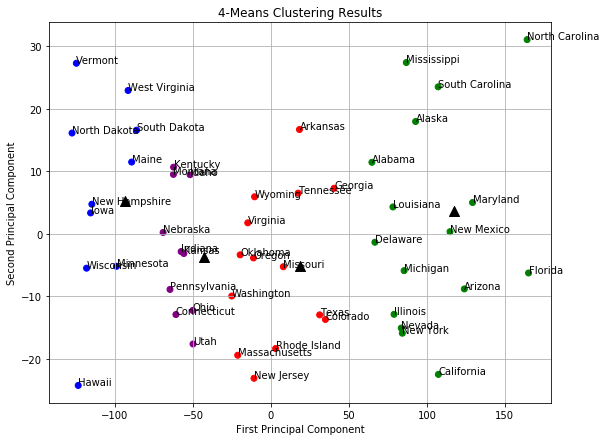

In [91]:
# K-means clustering with K = 4
km4 = KMeans(n_clusters=4, n_init=20).fit(crime)
km4.labels_
# Scatterplot of 4-means clustering results 
plt.figure(figsize=(9,7))
plt.scatter(crime2['Component 1'], crime2['Component 2'], c=np.array(['red', 'blue', 'green', 
                                                                      'purple'])[km4.labels_])
plt.scatter(pca1.fit_transform(km4.cluster_centers_)[:,0], pca1.fit_transform(km4.cluster_centers_)[:,1], 
            marker='^', s=100, c='k')
for i in crime2.index:
    plt.annotate(i, (crime2['Component 1'].loc[i]+.01, crime2['Component 2'].loc[i]+.01))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('4-Means Clustering Results')
plt.grid(True)
plt.show()

Compared to 2-means clustering results, 4-means clustering partitions observations into 4 groups. More notably, the classification seems to be determined based on the features most relevant to the first principal component. Since the first principal component approximately corresponds to the measure of crime rates in each state, we can probably conclude that the difference in crime rates is the main factor that determine the clustering groups.    

#### Question 4. K-means clustering with K = 3

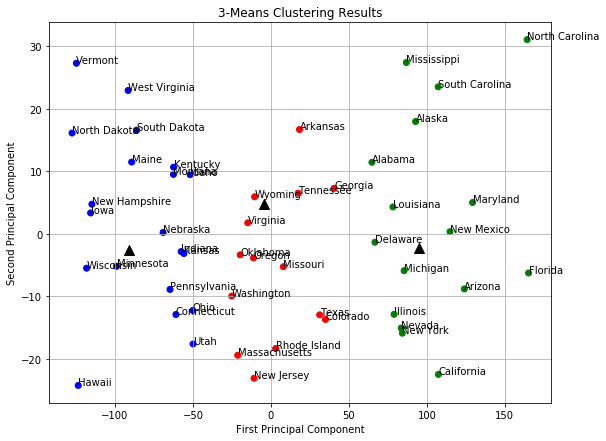

In [92]:
# K-means clustering with K = 3
km3 = KMeans(n_clusters=3, n_init=20).fit(crime)
km3.labels_
# Scatterplot of 3-means clustering results 
plt.figure(figsize=(9,7))
plt.scatter(crime2['Component 1'], crime2['Component 2'], c=np.array(['red', 'blue', 'green'])[km3.labels_])
plt.scatter(pca1.fit_transform(km3.cluster_centers_)[:,0], pca1.fit_transform(km3.cluster_centers_)[:,1], 
            marker='^', s=100, c='k')
for i in crime2.index:
    plt.annotate(i, (crime2['Component 1'].loc[i]+.01, crime2['Component 2'].loc[i]+.01))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('3-Means Clustering Results')
plt.grid(True)
plt.show()

3-means clustering divides the data into 3 groups. As discussed in question 3, the features closely related to the first principal component, which are crime rates in this case, are regarded as the main factor setting the clustering groups. Besides, the features relevant to the second principal component, which is urban population, appears silimar across different clustering groups.  

#### Question 5.  3-means clustering on the first two principal components 

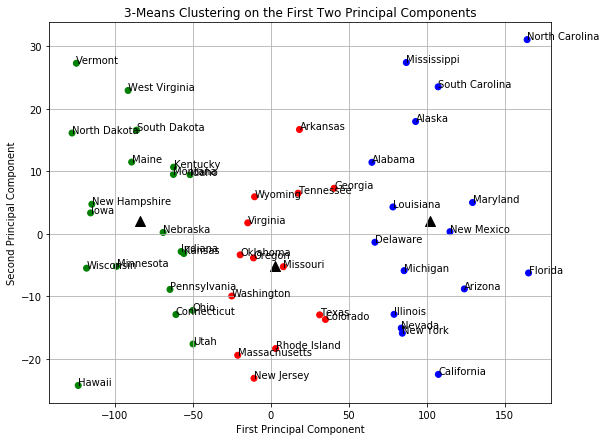

In [93]:
km3_pc = KMeans(n_clusters=3, n_init=20).fit(crime2)
km3_pc.labels_
# Scatterplot of 3-means clustering with the use of pc score vectors 
plt.figure(figsize=(9,7))
plt.scatter(crime2['Component 1'], crime2['Component 2'], c=np.array(['red', 'blue', 'green'])[km3_pc.labels_])
plt.scatter(km3_pc.cluster_centers_[:,0], km3_pc.cluster_centers_[:,1], marker='^', s=100, c='k')
for i in crime2.index:
    plt.annotate(i, (crime2['Component 1'].loc[i]+.01, crime2['Component 2'].loc[i]+.01))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('3-Means Clustering on the First Two Principal Components')
plt.grid(True)
plt.show()

The results are quite similar to those of performing 3-means clustering on the raw data. The main difference is that the locations of centroids within each group are slightly different. However, specific states belonging to each group remain the same when we perform 3-means clustering on the first two principal components. 

#### Question 6. Cluster the states by hierarchical clustering 

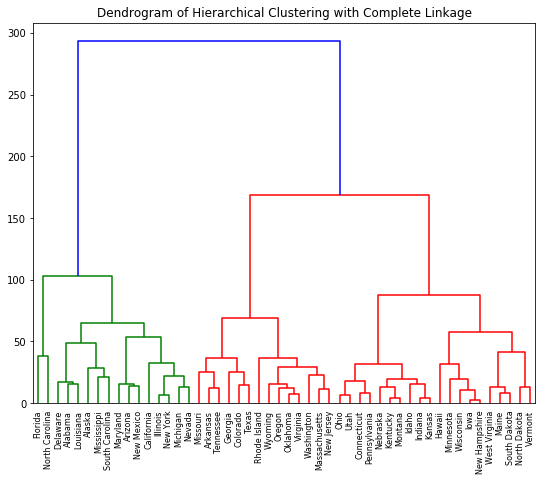

In [94]:
# Hierarchical clustering with complete linkage and Euclidean distance 
hierarchical_c = hr.complete(crime)
plt.figure(figsize=(9,7))
hr.dendrogram(hierarchical_c, labels = crime.index)
plt.title("Dendrogram of Hierarchical Clustering with Complete Linkage")
plt.show()

#### Question 7. Cut the dendrogram to have three distinct clusters 

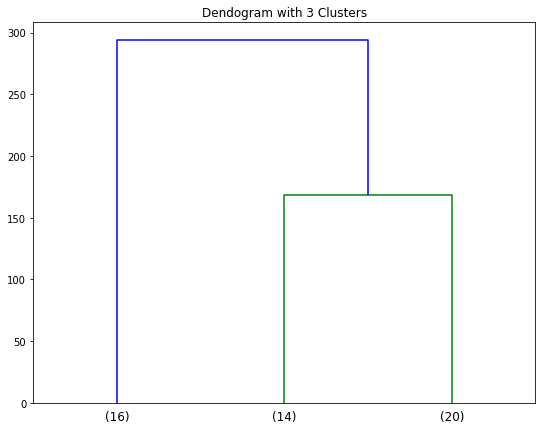

In [95]:
plt.figure(figsize=(9,7))
hr.dendrogram(hierarchical_c, truncate_mode='lastp', p=3, labels = crime.index)
plt.title("Dendogram with 3 Clusters")
plt.show()

Based on the dendrogram in Question 6, we can observe the states for each group:

Clustering group 1 (16 states): Florida, North Carolina, Delaware, Alabama, Louisiana, Alaska, Mississippi, South Carolina, Maryland, Arizona, New Mexico, California, Illinois, New York, Michigan, and Nevada. 

Clustering group 2 (14 states): Missouri, Arkansas, Tennessee, Georgia, Colorado, Texas, Rhode Island, Wyoming, Oregon, Oklahoma, Virginia, Washington, Massachusetts, and New Jersey. 

Clustering group 3 (20 states): Ohio, Utah, Connecticut, Pennsylvania, Nebraska, Kentucky, Montana, Idaho, Indiana, Kansas, Hawaii, Minnesota, Wisconsin, Iowa, New Hampshire, West Virginia, Maine, South Dakota, North Dakota, and Vermont. 

#### Question 8. Cluster the states by hierarchical clustering after scaling 

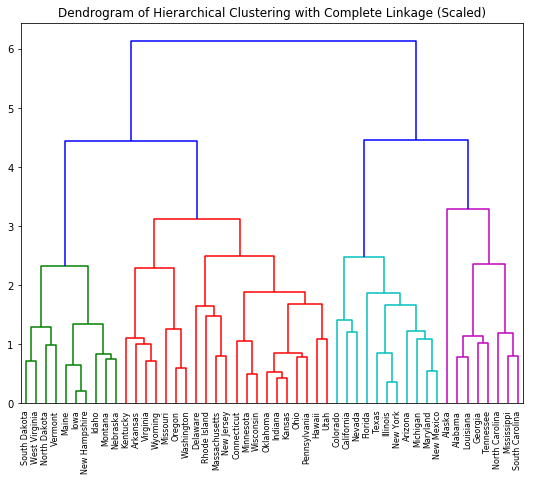

In [96]:
# Scale the data
crime_new = pd.DataFrame(scale(crime), columns = crime.columns, index = crime.index)
hierarchical_c1 = hr.complete(crime_new)
plt.figure(figsize=(9,7))
hr.dendrogram(hierarchical_c1, labels = crime_new.index)
plt.title("Dendrogram of Hierarchical Clustering with Complete Linkage (Scaled)")
plt.show()

After standardizing the variables, we obtain a more comparable hierarchical clustering which breaks down cluster groups a bit earlier than before. The results from scaled variables are more reasonable because we eliminate the effects of different units used and distinct variance across variables on partitioning cluster groups. Therefore, each cluster includes different states from those yielded without scaling. 